A group of notebooks to load the CMS 2008-2010 Data Entrepreneurs’ Synthetic Public Use File (DE-SynPUF).

https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/DE_Syn_PUF.html


The DE-SynPUF was created with the goal of providing a realistic set of claims data in the public domain while providing the very highest degree of protection to the Medicare beneficiaries’ protected health information.  The purposes of the DE-SynPUF are to:

1. allow data entrepreneurs to develop and create software and applications that may eventually be applied to actual CMS claims data;
2. train researchers on the use and complexity of conducting analyses with CMS claims data prior to initiating the process to obtain access to actual CMS data; and,
3. support safe data mining innovations that may reveal unanticipated knowledge gains while preserving beneficiary privacy.

The files have been designed so that programs and procedures created on the DE-SynPUF will function on CMS Limited Data Sets. The data structure of the Medicare DE-SynPUF is very similar to the CMS Limited Data Sets, but with a smaller number of variables.  The DE-SynPUF also provides a robust set of metadata on the CMS claims data that have not been previously available in the public domain.  Although the DE-SynPUF has very limited inferential research value to draw conclusions about Medicare beneficiaries due to the synthetic processes used to create the file, the Medicare DE-SynPUF does increase access to a realistic Medicare claims data file in a timely and less expensive manner to spur the innovation necessary to achieve the goals of better care for beneficiaries and improve the health of the population.

The DE-SynPUF contains five types of data – Beneficiary Summary, Inpatient Claims, Outpatient Claims, Carrier Claims, and Prescription Drug Events.

| DE-SynPUF | Unit of record | Number of Records 2008 | Number of Records 2009 | Number of Records 2010 |
| ----------|:---------------:|:---------------------:|:-----------------------:|:----------------------:|
| Beneficiary Summary | Beneficiary | 2,326,856 | 2,291,320 | 2,255,098 |
| Inpatient Claims | claim | 547,800 | 504,941 | 280,081 |
| Outpatient Claims | claim | 5,673,808 | 6,519,340 | 3,633,839 | 
| Carrier Claims | claim | 34,276,324 | 37,304,933 | 23,282,135 | 
| Prescription Drug Events (PDE) | event | 39,927,827 | 43,379,293 | 27,779,849 | 



### Accessing the files

Due to file size limitations, each data type in the CMS Linkable 2008-2010 Medicare DE-SynPUF is released in 20 separate samples (essentially each is a .25% sample).  All claims for a particular beneficiary are in samples with the same number (i.e. all beneficiaries in sample 1 have all their claims in the sample 1 files).  This design allows DE-SynPUF users who do not need the entire synthetic population of the DE-SynPUF to read in only as many samples as they desire.  

A unique cryptographic identifier, DESYNPUF_ID, identifying beneficiaries was provided in each CMS linkable 2008-2010 Medicare DE-SynPUF. DE-SynPUF users can link CMS Linkable 2008-2010 Medicare DE-SynPUFs using this Beneficiary Code, DESYNPUF_ID, as the linking key. However, DESYNPUF_ID was specifically created for DE-SynPUFs and carries no information about the patient or any patient records, and is provided solely for reference and data processing purposes.

#### Sample 1

Each of the 20 samples contains eight files – three beneficiary files (one for each year), one inpatient file containing three years of data, one outpatient file containing three years of data, one PDE file containing three years of data, and two carrier files containing three years of data (Carrier 1 and Carrier 2).  Because of file size limitations, a Carrier sample was split into two CSV files. Both CSV files in a sample must be downloaded.  The SAS read-in program for the Carrier files creates one SAS data set from the two CSV files in the sample.  Beneficiary data was obtained for each year that the beneficiary enrolled in Medicare.  A single Beneficiary sample contains three CSV files, one for each year.  Because beneficiary files contain time varying variables like chronic conditions, reimbursement variables, and death, three files (one for each year) were provided to keep the same variable name as in the actual data.  All three CSV files in a sample must be downloaded. The SAS read-in program for the Beneficiary files creates one SAS data set for each year within a sample. If the beneficiary dies between 2008 and 2010, the beneficiary will not have any data in years after the beneficiary’s death.

Although actual Medicare data are provided by year, De-SynPUFs provided three-year claims files to decrease the number of files users have to download and to take the advantage of multiple year data. Users can easily extract single year claims data.

Click on the file below to begin download:

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime


In [34]:


def process_url(urlstring):
    """A function to turn the CMS urls pointing to zipped files
    into dataframes. Returns a dataframe"""
    import requests, zipfile, StringIO
    r = requests.get(urlstring)
    z = zipfile.ZipFile(StringIO.StringIO(r.content))
    # need to tease out the appropiate part of the sample string
    df = pd.read_csv(z.open(urlstring.split('/')[-1].replace('zip','csv')))
    
    return df
    
    
    

## Collect all the zip urls for sample 1

In [30]:
sample1list = ["https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/" + \
               "SynPUFs/Downloads/DE1_0_2008_Beneficiary_Summary_File_Sample_1.zip",
              "http://downloads.cms.gov/files/DE1_0_2008_to_2010_Carrier_Claims_Sample_1A.zip",
              "http://downloads.cms.gov/files/DE1_0_2008_to_2010_Carrier_Claims_Sample_1B.zip",
              "https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/" + \
               "SynPUFs/Downloads/DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.zip",
              "https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/" + \
               "SynPUFs/Downloads/DE1_0_2008_to_2010_Outpatient_Claims_Sample_1.zip",
              "http://downloads.cms.gov/files/DE1_0_2008_to_2010_Prescription_Drug_Events_Sample_1.zip",
              "https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/" + \
               "SynPUFs/Downloads/DE1_0_2009_Beneficiary_Summary_File_Sample_1.zip",
              "https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/" + \
               "SynPUFs/Downloads/DE1_0_2010_Beneficiary_Summary_File_Sample_1.zip"]

In [36]:
sample1list[0]

'https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/DE1_0_2008_Beneficiary_Summary_File_Sample_1.zip'

## First load and transform the beneficiary files

The codebook is given here
https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/SynPUF_Codebook.pdf



In [74]:
dfbene2008 = process_url(sample1list[0])

In [75]:
dfbene2008.columns

Index([u'DESYNPUF_ID', u'BENE_BIRTH_DT', u'BENE_DEATH_DT',
       u'BENE_SEX_IDENT_CD', u'BENE_RACE_CD', u'BENE_ESRD_IND',
       u'SP_STATE_CODE', u'BENE_COUNTY_CD', u'BENE_HI_CVRAGE_TOT_MONS',
       u'BENE_SMI_CVRAGE_TOT_MONS', u'BENE_HMO_CVRAGE_TOT_MONS',
       u'PLAN_CVRG_MOS_NUM', u'SP_ALZHDMTA', u'SP_CHF', u'SP_CHRNKIDN',
       u'SP_CNCR', u'SP_COPD', u'SP_DEPRESSN', u'SP_DIABETES', u'SP_ISCHMCHT',
       u'SP_OSTEOPRS', u'SP_RA_OA', u'SP_STRKETIA', u'MEDREIMB_IP',
       u'BENRES_IP', u'PPPYMT_IP', u'MEDREIMB_OP', u'BENRES_OP', u'PPPYMT_OP',
       u'MEDREIMB_CAR', u'BENRES_CAR', u'PPPYMT_CAR'],
      dtype='object')

In [76]:
dfbene2008.DESYNPUF_ID.describe()

count               116352
unique              116352
top       FEDB5E029FB6554F
freq                     1
Name: DESYNPUF_ID, dtype: object

```DESYNPUF_ID``` is a cryptographic number provided on each file to link claims to a beneficiary. This beneficiary ID carries no information about the patient or any patient records, and is provided for reference and data processing purposes.

### Need to transform ```BENE_BIRTH_DT``` into a date

In [77]:
import datetime as dt

dfbene2008['BENE_BIRTH_DT'] = dfbene2008['BENE_BIRTH_DT'].apply(lambda x: pd.to_datetime(str(x),
                    format='%Y%m%d'))

In [78]:
dfbene2008['BENE_BIRTH_DT']

0        1923-05-01
1        1943-01-01
2        1936-09-01
3        1941-06-01
4        1936-08-01
5        1943-10-01
6        1922-07-01
7        1935-09-01
8        1976-09-01
9        1938-10-01
10       1934-02-01
11       1929-06-01
12       1936-07-01
13       1934-05-01
14       1936-03-01
15       1934-01-01
16       1919-09-01
17       1919-10-01
18       1942-07-01
19       1938-04-01
20       1932-08-01
21       1942-08-01
22       1932-07-01
23       1931-03-01
24       1965-04-01
25       1939-12-01
26       1940-04-01
27       1937-10-01
28       1938-04-01
29       1959-11-01
            ...    
116322   1959-08-01
116323   1956-12-01
116324   1942-07-01
116325   1947-03-01
116326   1910-02-01
116327   1920-05-01
116328   1943-03-01
116329   1943-11-01
116330   1928-11-01
116331   1925-08-01
116332   1919-05-01
116333   1950-02-01
116334   1953-10-01
116335   1922-05-01
116336   1940-06-01
116337   1922-09-01
116338   1920-01-01
116339   1936-08-01
116340   1935-06-01


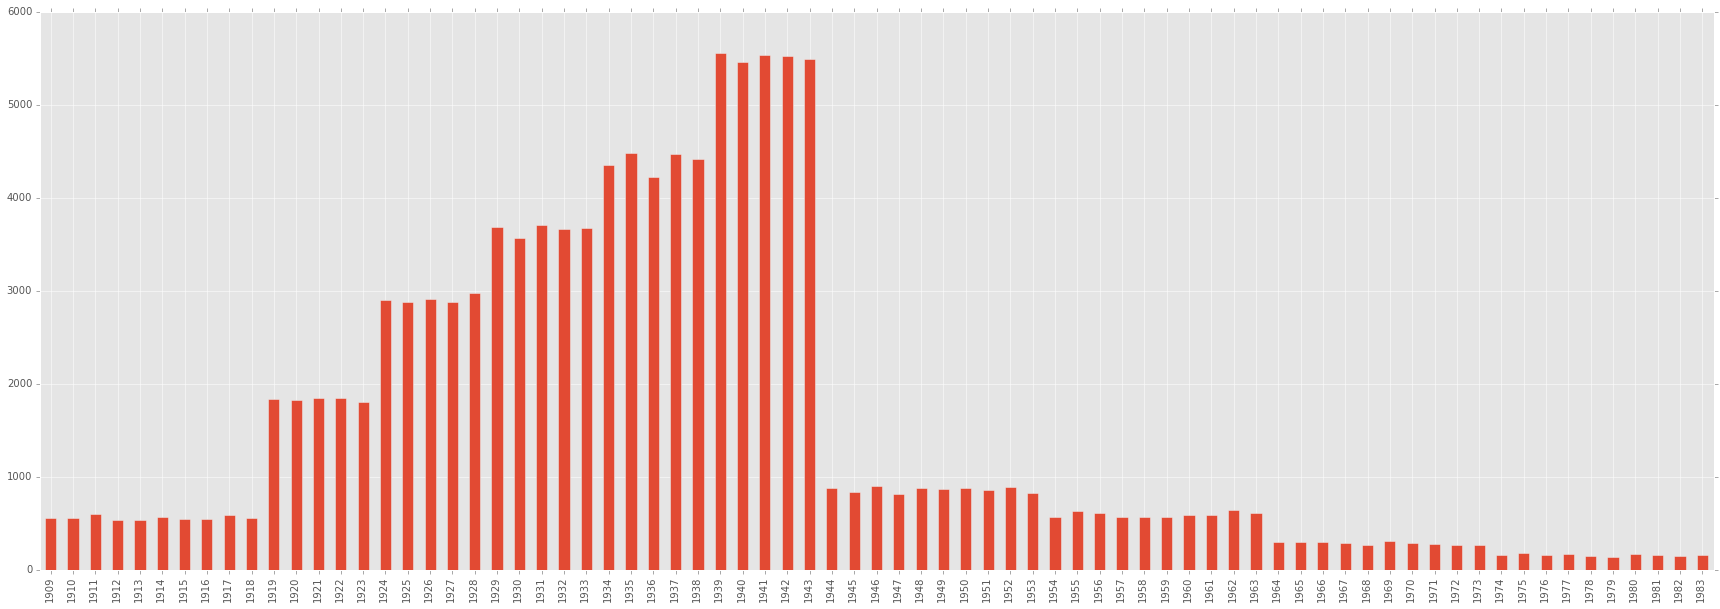

In [79]:
dfbene2008['BENE_BIRTH_DT'].dt.year.value_counts().sort_index().plot(kind='bar',figsize=(30,10))

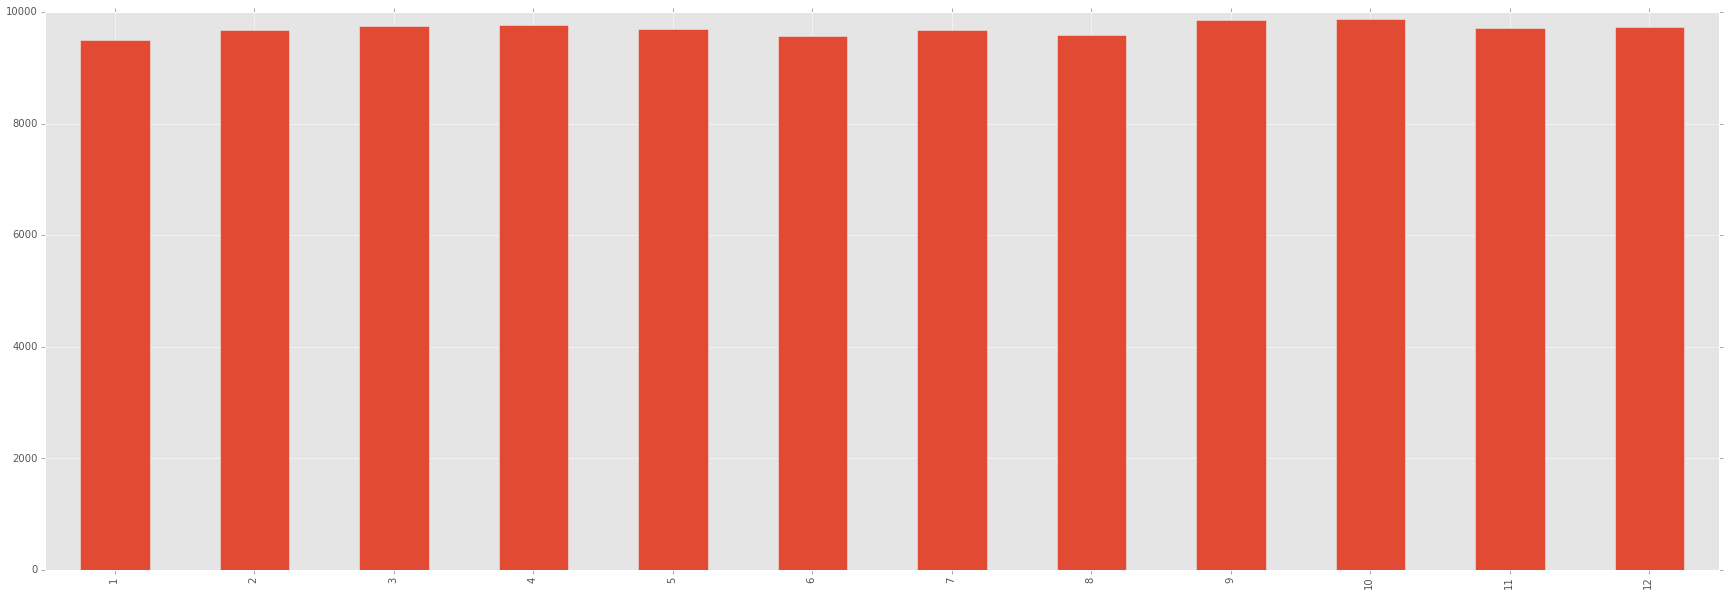

In [80]:
dfbene2008['BENE_BIRTH_DT'].dt.month.value_counts().sort_index().plot(kind='bar',figsize=(30,10))

In [81]:
import datetime as dt

dfbene2008['BENE_DEATH_DT'] = dfbene2008['BENE_DEATH_DT'].apply(lambda x: pd.to_datetime(str(x),
                    format='%Y%m%d'))

In [82]:
dfbene2008['BENE_DEATH_DT'].value_counts()

2008-09-01    166
2008-01-01    164
2008-11-01    158
2008-05-01    158
2008-03-01    156
2008-10-01    155
2008-12-01    153
2008-07-01    149
2008-02-01    142
2008-04-01    141
2008-08-01    140
2008-06-01    132
Name: BENE_DEATH_DT, dtype: int64

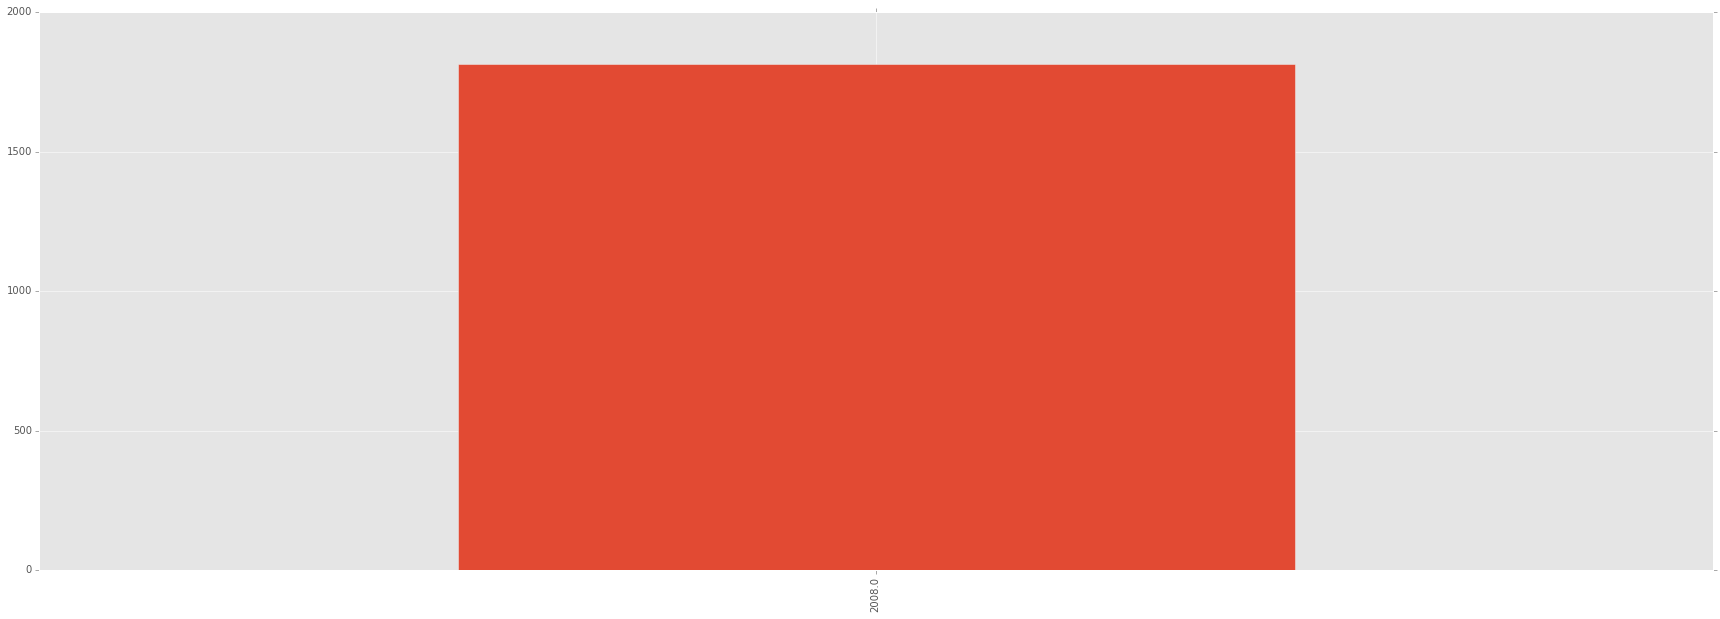

In [83]:
dfbene2008['BENE_DEATH_DT'].dt.year.value_counts().sort_index().plot(kind='bar',figsize=(30,10))

In [86]:
dfbene2008['BENE_DEATH_DT'].dt.month.value_counts().sort_index()

# September is when people die

1     164
2     142
3     156
4     141
5     158
6     132
7     149
8     140
9     166
10    155
11    158
12    153
Name: BENE_DEATH_DT, dtype: int64